In [1]:
import pandas as pd
import numpy as np

In [ ]:
# load dataset from file csv
filename = 'TwitterUSAirlineSentiment.xlsx'#'electron1'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"
f =filepath+filename

#df=pd.read_csv(f,  sep=';', encoding='utf8')
#df=pd.read_csv(f,  sep=';', encoding='cp1252' )
#df=pd.read_csv(f,  sep=';', encoding='Latin-1')
#df=pd.read_csv(f,  sep=';', encoding='ANSI')

df = pd.read_excel(f, 0)  

# this gives us the size of the array
print('Dataset size', df.shape)

# here we can get size of array as two variables
num_rows, num_feature = df.shape

print('row number: ', num_rows)
print('feature number: ', num_feature)
print()
print('names of features: ', list(df))

print('-------------------')
print('full data loaded')
print('-------------------')

In [5]:
df

,airline_sentiment,text,tweet_coord,tweet_created
0,negative,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36
1,negative,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45
2,negative,@VirginAmerica seriously would pay $30 a fligh...,NaN,NaT
3,negative,@VirginAmerica SFO-PDX schedule is still MIA.,NaN,2015-02-24 10:01:50
4,negative,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46
...,...,...,...,...
14635,positive,@AmericanAir Love the new planes for the JFK-L...,NaN,2015-02-22 12:10:16
14636,positive,@AmericanAir Flight 236 was great. Fantastic c...,"[40.64946781, -73.76624703]",2015-02-22 12:08:48
14637,positive,Thank you. вЂњ@AmericanAir: @jlhalldc Customer...,NaN,2015-02-22 12:04:51
14638,positive,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09


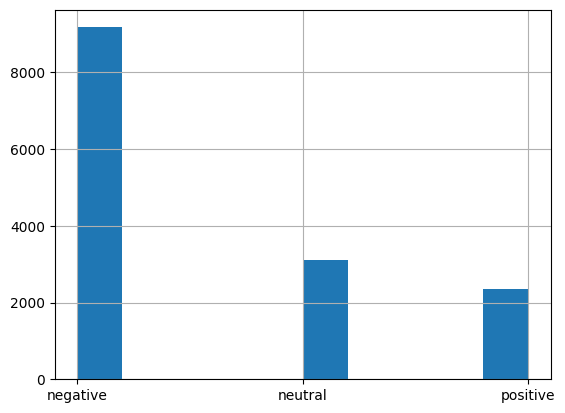

In [6]:
# pandas histogram
h = df['airline_sentiment'].hist()
fig = h.get_figure()

In [7]:
# let do dataset with balanced class
# we will split up dataset into 3 parts

neut_df= df[df["airline_sentiment"] == "neutral"]
neg_df= df[df["airline_sentiment"] == "negative"]
pos_df= df[df["airline_sentiment"] == "positive"]

In [8]:
# now we will reduce size of negative dataset
print(neg_df.shape)

(9178, 4)


In [9]:
# We will try to downsample
# it means we will reduce number of items in one class
# see https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

from sklearn.utils import resample
print('neg_dataset before sampling: ', neg_df.shape)

neg_downsample = resample(neg_df,
             replace=True,
             n_samples=3000,
             random_state=42)

print('neg_dataset after sampling: ', neg_downsample.shape)

neg_dataset before sampling:  (9178, 4)
neg_dataset after sampling:  (3000, 4)


In [10]:
# now we joint all parts into one dataset and do shuffle
# joing og datasets
new_data = pd.concat([neg_downsample, neut_df, pos_df])
print(new_data.shape)

(8462, 4)


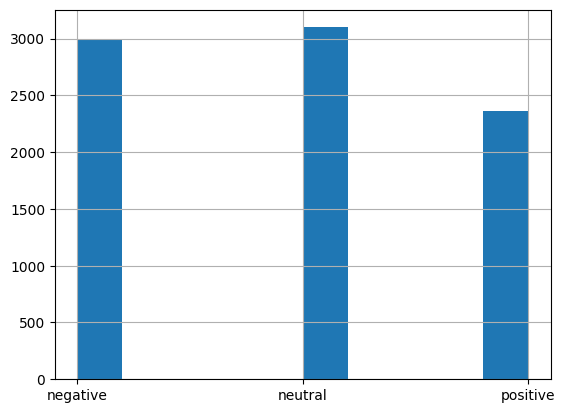

In [11]:
# pandas histogram
h = new_data['airline_sentiment'].hist()
fig = h.get_figure()

In [12]:
# how we have to do shuffle
from sklearn.utils import shuffle
shuf_data = shuffle(new_data)
shuf_data

,airline_sentiment,text,tweet_coord,tweet_created
5016,negative,@USAirways So frustrating because I still have...,NaN,2015-02-24 07:49:39
10772,neutral,@JetBlue can your people working this contact ...,"[40.76262466, -73.73946148]",2015-02-23 16:45:57
3124,negative,@SouthwestAir here's a first..both pilot and f...,NaN,2015-02-22 10:56:27
7790,negative,@AmericanAir trying to change flight via DFW t...,NaN,2015-02-23 16:21:06
5036,negative,@USAirways they have all of this at hotels. St...,NaN,2015-02-24 06:30:04
...,...,...,...,...
14628,positive,@AmericanAir You guys did an amazing job today...,NaN,2015-02-22 12:57:23
1331,negative,@United - routing a person from Houston to New...,NaN,2015-02-21 21:29:12
10658,neutral,@SouthwestAir what is DM?,NaN,2015-02-17 13:02:55
3839,negative,@SouthwestAir paid for my own $200 rental car ...,NaN,2015-02-17 15:42:05


In [13]:
# note the index of the array, at this point it has non sequential numbers.
# We need to change these numbers to a standard sequence of numbers.
#shuf_data_ind = shuf_data.reset_index()
shuf_data.index = np.arange(len(shuf_data))
shuf_data

,airline_sentiment,text,tweet_coord,tweet_created
0,negative,@USAirways So frustrating because I still have...,NaN,2015-02-24 07:49:39
1,neutral,@JetBlue can your people working this contact ...,"[40.76262466, -73.73946148]",2015-02-23 16:45:57
2,negative,@SouthwestAir here's a first..both pilot and f...,NaN,2015-02-22 10:56:27
3,negative,@AmericanAir trying to change flight via DFW t...,NaN,2015-02-23 16:21:06
4,negative,@USAirways they have all of this at hotels. St...,NaN,2015-02-24 06:30:04
...,...,...,...,...
8457,positive,@AmericanAir You guys did an amazing job today...,NaN,2015-02-22 12:57:23
8458,negative,@United - routing a person from Houston to New...,NaN,2015-02-21 21:29:12
8459,neutral,@SouthwestAir what is DM?,NaN,2015-02-17 13:02:55
8460,negative,@SouthwestAir paid for my own $200 rental car ...,NaN,2015-02-17 15:42:05


In [14]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /home/yoren/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yoren/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yoren/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from tqdm import tqdm
import re
y_data = []

for i in tqdm(range(8462)):
    s = str(shuf_data['text'][i])
    s1 = re.sub(r"[;,.?“/&!@#$1234567890#—ツ►๑۩۞۩•*”˜˜”*°°*`)(]", '', s)
    word_list = nltk.word_tokenize(s1)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    y_data.append(lemmatized_output)
    
print('Lematization is over')

  0%|          | 0/8462 [00:00<?, ?it/s]

100%|██████████| 8462/8462 [00:06<00:00, 1218.17it/s]

Lematization is over


In [16]:
# now we have lemtized data in y_data
# we need do small job for our sentiment score
shuf_data['airline_sentiment'] = shuf_data['airline_sentiment'].str.replace('neutral','0')
shuf_data['airline_sentiment'] = shuf_data['airline_sentiment'].str.replace('positive','1')
shuf_data['airline_sentiment'] = shuf_data['airline_sentiment'].str.replace('negative','-1')
shuf_data['airline_sentiment'] = shuf_data['airline_sentiment'].astype(int)

In [17]:
shuf_data['airline_sentiment']

0      -1
1       0
2      -1
3      -1
4      -1
       ..
8457    1
8458   -1
8459    0
8460   -1
8461   -1
Name: airline_sentiment, Length: 8462, dtype: int64

In [18]:
# How we have correct dataset
# let get target value
Y= shuf_data['airline_sentiment'].values

# We will transform it into tfidf matrix
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(ngram_range=(1,1),stop_words=(stopwords))

# we extract words (calculate tf-idf frequence) and transform data to array
data = vec.fit_transform(y_data).toarray()

num_docs, num_feature = data.shape
print('number of docs: ', num_docs, ' number features: ', num_feature)

number of docs:  8462  number features:  9592


# GradientBoostingClassifie

Boosting is an ensemble construction technique in which predictors are not constructed independently, but sequentially

This technique uses the idea that the next model will learn from the errors of the previous model. They have an unequal probability of appearing in subsequent models, and the ones that give the largest error are more likely to appear. Predictors can be chosen from a wide range of models, such as decision trees, regression, classifiers, etc. The logic behind gradient boosting is simple and can be understood intuitively, without mathematical formalism. The first assumption of linear regression is that the sum of the outliers = 0, i.e. the outliers must be randomly distributed in the neighborhood of zero. Now let's think of deviations as errors made by our model.So, the intuition behind the gradient-busting algorithm is to iteratively apply patterns of deviations and improve predictions. Once we reach a point where the outliers have no pattern, we stop refining our model (otherwise it may lead to overfitting). Algorithmically, we minimize our loss function.


First, we build simple models and analyze the errors;
Identify points that do not fit into the simple model;
Add models that handle the complex cases that were identified on the initial model;
Assemble all the models built, determining the weight of each predictor.
https://neurohive.io/ru/osnovy-data-science/gradientyj-busting/ https://www.kaggle.com/grroverpr/gradient-boosting-simplified/

Set up a linear regression or decision tree on the data
Calculate error errors. Actual target value, minus predicted target value [e1 = y - y_predicted1]
Set up a new model for outliers as the target variable with the same input variables [name it e1_predicted]
Add the predicted outliers to the previous predictions [y_predicted2 = y_predicted1 + e1_predicted]
Set up another model of the remaining outliers. i.e. [e2 = y - y_predicted2], and repeat steps 2 through 5 until they start overfitting, or the sum becomes constant. The overfitting control can be controlled by constantly checking the accuracy on the data for validation.


## GradientBoostingClassifie
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.htm
https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=42)
print('Size of the test collection: ', X_test.shape)
print('Size of the training collection: ', X_train.shape)

Size of the test collection:  (1693, 9592)
Size of the training collection:  (6769, 9592)


In [1]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

TypeError: GradientBoostingClassifier.__init__() got an unexpected keyword argument 'class_weight'

In [3]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.2],
    "min_samples_split": [0.01, 0.2],
    "max_depth":[3,8],
    "max_features":["log2","sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[10]
    }


clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)

clf.fit(X_train, y_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'class_weight'